# Distribuciones Discretas Introducción

Nayibe Yesenia Arias Cortez

Usaremos ```scipy.stats``` para las distribuciones teoricas y ```numpy.random``` para producir datos aleatorios bajo una distribución determinada para simular un conjunto de datos y hacer la distribución empírica.

* **Distribución empírica:** Es la distribución de los datos de la muestra.

* **Distribución teórica:** Es la distribución binomial, hipergeométrica, normal, etc que aprendemos normalmente y de donde aprendemos a sacar probabilidades con las diferentes distribuciones.

La idea es que la distribución empírica puede emparejarse a una distribución teorica, con la cual podemos sacar las probabilidades de nuestro conjunto de datos.

_Librerías a usar:_

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

[numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html)

## Distribución Biomial

La probabilidad de éxito es constante de un ensayo a otro

### Librerías

In [ ]:
import numpy as np
from numpy.random import binomial #generador aleatorio de numeros basados en la distro binomial
from scipy.stats import binom #distro teorica
from math import factorial
import matplotlib.pyplot as plt #visualizaciones

### Generando números aleatorios distribución binomial

Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas

El resultado o salida del siguiente código es la realizacion de la variable aleatoria __X__ = __"# de exitos despues de n repeticiones del experimento aleatorio"__

Es decir, da el número de éxitos despues de repetir __n=3__ veces el experimento aleatorio con probabilidad de exito de __p=0.5__. 

Es claro que al sacar el numero de exitos, éste puede ser 0 por lo que los valores salida de este código estarán dentro del conjunto {0,1,2,3} para este caso, pues al repetir el experimento n=3 veces, podemos obtener:
* 0 éxitos
* 1 éxito
* 2 éxitos
* 3 éxitos

In [ ]:
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)


0

In [ ]:
#Simulando 100 lanzamientos
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))
print(arr)

[2, 3, 2, 0, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 3, 1, 3, 0, 3, 1, 3, 0, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3, 1, 0, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 1, 2]


Cálculo de frecuencias (absolutas) de los valores de posibles exitos (variable aleatoria X) generados con el anterior código en este experimento, es decir {0,1,2,3}

In [ ]:
#frecuencias
np.unique(arr, return_counts=True)

(array([0, 1, 2, 3]), array([13, 36, 35, 16]))

Cálculo de probabilidades de los valores de posibles exitos (variable aleatoria X) en este experimento es decir {0,1,2,3} 

__(TANTO DE LA DISTRIBUCIÓN TEÓRICA(la que venimos trabajando) COMO DE LA EMPÍRICA)__

In [ ]:
# Probabilidades Distribución Empírica
np.unique(arr, return_counts=True)[1]/len(arr) # Claramente estas probabilidades cambian de acuerdo a la muestra generada por el generador aleatorio

array([0.13, 0.36, 0.35, 0.16])

In [ ]:
#probabilidades Distribución Teórica
values= [0,1,2,3] # valores que puede tomar nuestra variable aleatoria x
[binom(3,0.5).pmf(k) for k in values]   #claramente estas probabilidades son fijas pues es distro teorica

[0.125, 0.3750000000000001, 0.3750000000000001, 0.125]

### Graficando distribución binomial: empirica y teórica 
* Empírica o simulada : AZUL
* Teórica : ROJO 

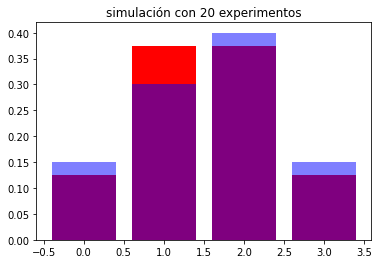

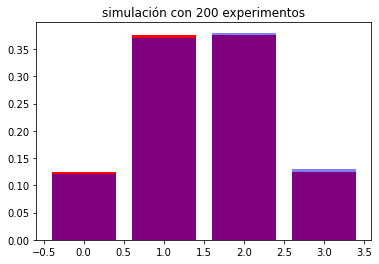

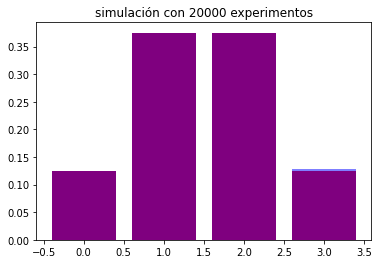

In [ ]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))#generador de simulacion de lanzamientos bajo la distro binomial
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr) #de los datos que obtendría lanzando 20
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()
#repitamos 20 veces el experimento de: lanzar una moneda 3 veces y contar frecuencias de exitos {0,1,2,3} segun distro teórica y simulada o empírica 
plot_hist(20)
#repitamos 200 veces el experimento de: lanzar una moneda 3 veces y contar frecuencias de exitos {0,1,2,3} segun distro teórica y simulada o empírica 
plot_hist(200)
#repitamos 20000 veces el experimento de: lanzar una moneda 3 veces y contar frecuencias de exitos {0,1,2,3} segun distro teórica y simulada o empírica 
plot_hist(20000)

### Conclusión


A más repeticiones del experimento:
* lanzar una moneda 3 veces y contar frecuencias de exitos {0,1,2,3} segun distro teórica y simulada o empírica

más se parecen las distribuciones teórica y empírica o simulada.

Esto aplica para cualquier otro experimento y cualquier otra variable aleatoria.

### Calculando los primeros 4 momentos de esta distribución con este experimento en específico (distro teórica)

calcula: 
* __Valor esperado__
* __Varianza__
* __skew__ (asimetría positiva negativa o simetrica)
* __curtosis__ : SOLO SE CALCULA PARA DISTRIBUCIONES SIMÉTRICAS(platicurtica, mesocúrtica, leptocúrtica)

In [ ]:
n, p = 3, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(mean,var,skew,kurt)

1.5 0.75 0.0 -0.6666666666666666


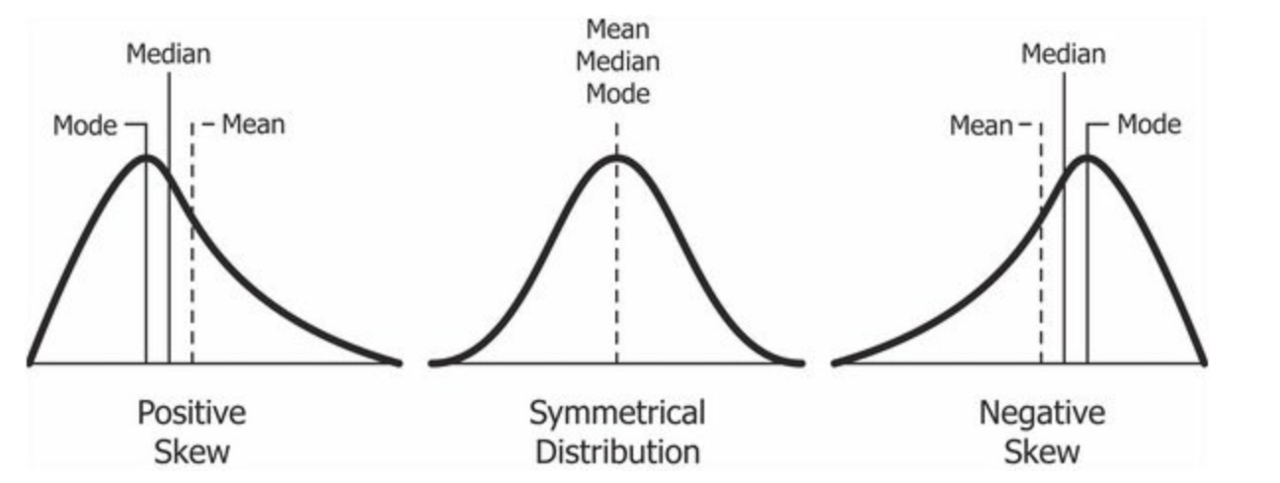

#### Interpretación
__Media / Valor Esperado : 1.5__ 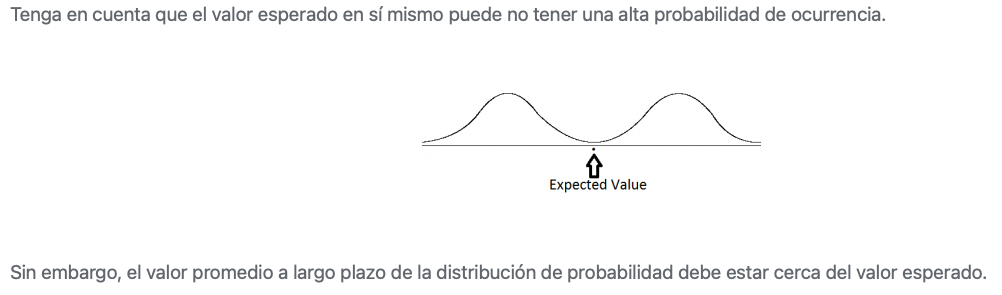


Recuerde que la media nunca se interpreta sola, siempre hay que interpretar la __media__ y __varianza__ juntas ya que la una da sentido a la otra.
* Media / Valor Esperado : 1.5
* Varianza: 0.75

Lo anterior significa: los valores de la distribución se agrupan al rededor de 1.5 éxitos con una varianza de 0.75 ¿cómo saber si la varianza es alta o no?

__asimetría=0__ significa que la distribución de nuestro ejemplo es simétrica.

__curtosis=0.66__ significa que nuestra distribución es leptocurtica.

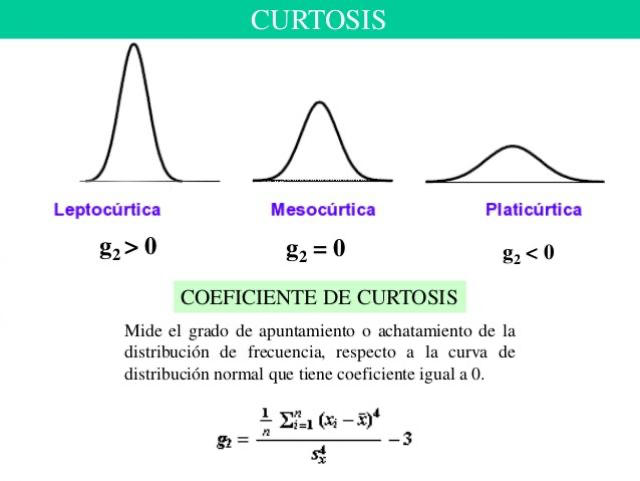